In [2]:
import numpy as np
import pandas as pd
import ants

import glob
import re

In [3]:
paths=[]

data_dir = '/Users/daniel/Downloads/AD_MRI/oasis-scripts-master/download_scans/data'
mni_path = '/Users/daniel/Downloads/AD_MRI/MNI152_T1_1mm.nii.gz'

subject_pattern = re.compile('OAS\d{5}')
paths=glob.glob(data_dir+'/**/*.nii*',recursive=True)
subs = [subject_pattern.findall(i)[0] for i in paths]
subs = list(np.unique(subs))

mni_path = '/Users/daniel/Downloads/AD_MRI/MNI152_T1_1mm.nii.gz'
mni = ants.image_read(mni_path,pixeltype='unsigned int')
subs

[]

(120, 160, 15)

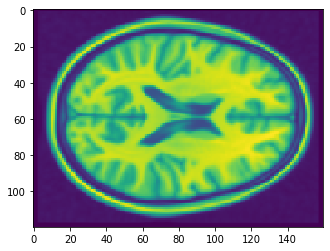

In [25]:
mni_np=mni.resample_image((120,160,120),use_voxels=True).numpy()


import matplotlib.pyplot as plt

plt.imshow(mni_np[:,:,60])




mni_np[:,:,50:65].shape

In [18]:
subject_pattern = re.compile('OAS\d{5}')

z=re.findall(subject_pattern,paths[0])[0]

z

'OAS30006'

In [3]:
def my_minmax(z):
    return (z-np.min(z))/(np.max(z)-np.min(z))

data = {}
for sub in subs:
    data[sub]={}
    files = [i for i in paths if sub in i]
    data_raw = ants.image_read(files[0],pixeltype='unsigned int')
    transform = ants.registration(fixed=mni,moving=data_raw,type_of_transform='SyN')
    data[sub]['image']=ants.apply_transforms(fixed=mni,moving=data_raw,transformlist=transform['fwdtransforms']).resample_image((120,160,120),use_voxels=True)
    data[sub]['image']= my_minmax(data[sub]['image'].numpy())
    if sub in ('OAS30019','OAS30022','OAS30024','OAS30027'):
        data[sub]['group']='AD'
    else:
        data[sub]['group']='CN'

In [ ]:
data_norm = []

for img in data_raw:
    transform = ants.registration(fixed=mni,moving=img,type_of_transform='SyN')
    data_norm.append(ants.apply_transforms(fixed=mni,moving=img,transformlist=transform['fwdtransforms']))

In [ ]:
ants.plot(data_norm[0],overlay=data_norm[1],overlay_alpha=0.5)

In [ ]:
ants.plot(data_raw[0],overlay=data_raw[1],overlay_alpha=0.5)

In [ ]:
from sys import getsizeof
ants.plot(data_norm[0].resample_image((120,160,120),use_voxels=True))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
z=data_norm[0].resample_image((120,160,120),use_voxels=True).numpy()

z_MMS = (z-np.min(z))/(np.max(z)-np.min(z))

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(z_MMS[50,:,:])

In [ ]:
z_MMS

In [ ]:
plt.imshow(data['OAS30019']['image'][:,80,:])

In [14]:
import pickle

with open('test_subjects', 'wb') as f:
    pickle.dump(data, f)

In [2]:
import pickle
with open('OAS30006_data','rb') as f:
    ppp = pickle.load(f)

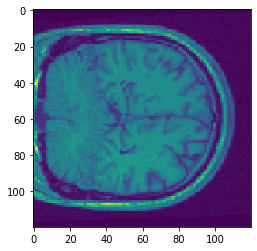

In [4]:
import matplotlib.pyplot as plt
plt.imshow(ppp['image'][:,50,:])

In [1]:
import matplotlib.pyplot as plt
plt.figure()
for sub in ppp.keys():
    plt.figure()
    plt.imshow(ppp[sub]['image'][:,:,50])#,alpha=0.1)

NameError: name 'ppp' is not defined

<Figure size 432x288 with 0 Axes>

In [35]:
list(ppp.keys())[-2]

'OAS30024'

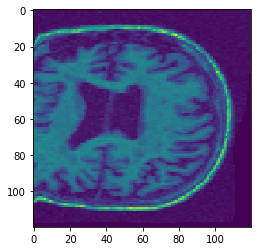

In [14]:
plt.imshow(ppp['OAS30022']['image'][:,50,:])

In [25]:
def my_minmax(z):
    return (z-np.min(z))/(np.max(z)-np.min(z))

data = {}
for sub in ('OAS30022','OAS30023'):
    data[sub]={}
    files = [i for i in paths if sub in i]
    data_raw.append( ants.image_read(files[0],pixeltype='unsigned int'))

IndexError: list index out of range

In [48]:
files = [i for i in paths if 'OAS30024' in i]
z = ants.image_read(files[0])


print(z.get_orientation())
print(mni.get_orientation())


LPI
RPI


In [4]:
def my_minmax(z):
    return (z-np.min(z))/(np.max(z)-np.min(z))

data = {}
for sub in ('OAS30024',):
    data[sub]={}
    files = [i for i in paths if sub in i]
    data_raw = ants.image_read(files[0],pixeltype='unsigned int')
    data_raw = data_raw.reorient_image2('RPI')
    print(data_raw.get_orientation())
    transform = ants.registration(fixed=mni,moving=data_raw,type_of_transform='SyN')
    data[sub]['image']=ants.apply_transforms(fixed=mni,moving=data_raw,transformlist=transform['fwdtransforms']).resample_image((120,160,120),use_voxels=True)
    data[sub]['image']= my_minmax(data[sub]['image'])#.numpy())
    if sub in ('OAS30019','OAS30022','OAS30024','OAS30027'):
        data[sub]['group']='AD'
    else:
        data[sub]['group']='CN'
        
#plt.imshow(data['OAS30024']['image'][:,60,:])

NameError: name 'paths' is not defined

In [54]:
mni.get_orientation()

'RPI'

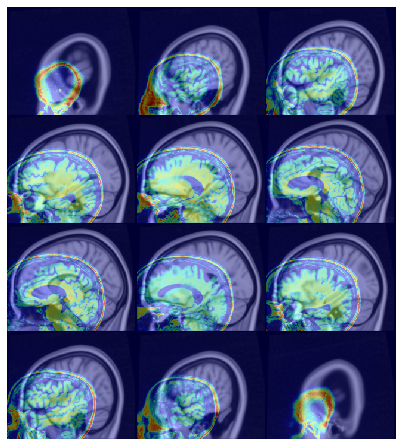

In [80]:
ants.plot(mni,overlay=data_raw,overlay_alpha=0.4)

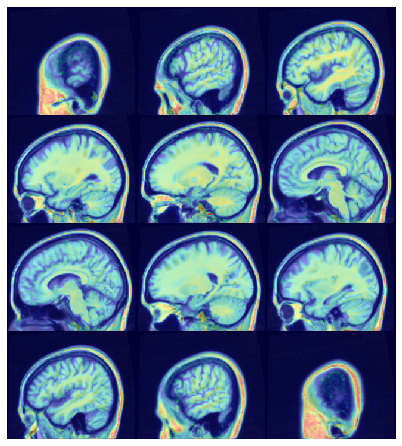

In [88]:
ants.plot(mni,overlay=data['OAS30024']['image'],overlay_alpha=0.4)

In [ ]:
ppp

In [7]:
bad_dir = '/Users/daniel/.CMVolumes/Daniel\ Brennan/AD_MRI_DATA/OAS30022_MR_d1324/anat3/sub-OAS30022_ses-d1324_run-01_T1w.nii.gz'

In [9]:
import ants
bad_test = ants.image_read(bad_dir)

ValueError: File /Users/daniel/.CMVolumes/Daniel\ Brennan/AD_MRI_DATA/OAS30022_MR_d1324/anat3/sub-OAS30022_ses-d1324_run-01_T1w.nii.gz does not exist!

In [ ]:
transform = ants.registration(fixed=mni,moving=data_raw,type_of_transform='SyN')
    data[sub]['image']=ants.apply_transforms(fixed=mni,moving=data_raw,transformlist=transform['fwdtransforms']).resample_image((120,160,120),use_voxels=True)

In [10]:
import ants
mni_path = '/Users/daniel/Downloads/AD_MRI/MNI152_T1_1mm.nii.gz'
mni = ants.image_read(mni_path)
mni_np = mni.resample_image((120,160,120),use_voxels=True).numpy()

In [8]:
import pickle
with open('../OAS30195_data','rb') as f:
    data = pickle.load(f)

In [9]:
img = data['image']

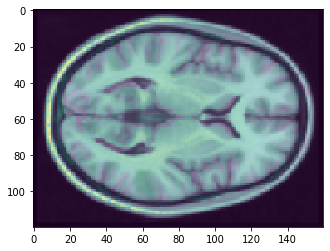

In [24]:
import matplotlib.pyplot as plt
plt.imshow(mni_np[:,:,50],origin='lower',cmap='gray')
plt.imshow(img[:,:,50],alpha=0.4)

In [27]:
data

{'subject': 'OAS30195',
 'age': 67.0,
 'diagnosis': 'CN',
 'scan_ID': 'OAS30195_MR_d0193',
 'image': array([[[0.00171695, 0.0054391 , 0.0072048 , ..., 0.00414748,
          0.00404736, 0.00423416],
         [0.00321858, 0.00392948, 0.0063508 , ..., 0.00407325,
          0.00353849, 0.00315192],
         [0.00402046, 0.01207522, 0.00499491, ..., 0.00596201,
          0.00262874, 0.00319016],
         ...,
         [0.00419685, 0.01797376, 0.01173616, ..., 0.0039841 ,
          0.00553595, 0.00495559],
         [0.00909929, 0.00788454, 0.00689463, ..., 0.00643145,
          0.00967304, 0.00744049],
         [0.01208576, 0.01443641, 0.01082528, ..., 0.00610816,
          0.00756021, 0.00395896]],
 
        [[0.00460148, 0.00512362, 0.00742478, ..., 0.00326893,
          0.00240581, 0.00220128],
         [0.00543199, 0.00660873, 0.01263072, ..., 0.00197077,
          0.00311307, 0.00499198],
         [0.00433211, 0.00470368, 0.00617835, ..., 0.00574206,
          0.00496488, 0.00497766],
 